# Lista de Exercício 4
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste em 4 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Thallys Oliveira`

`Número USP: 11819827`


### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage.transform import hough_circle, hough_circle_peaks

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [2]:
import urllib.request


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/wirebond_mask.tif", "wirebond_mask.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/house.tif", "house.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora.tif", "abobora.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/sudoku.tif", "sudoku.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/cores.jpeg", "cores.jpeg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")



## 1) Detector de bordas

#### 1.1) Prewitt e Sobel (Nota 1.5/10)

1. Aplicar os detectores de bordas **verticais e horizontais** de Prewitt na imagem ```wirebond_mask.tif```. Mostre a imagens original e as resultantes em um subplot.

2. Aplicar os detectores de bordas **verticais e horizontais** de Sobel na imagem ```wirebond_mask.tif```. Mostre a imagens original e as resultantes em um subplot.

2. Comente os resultados encontrados.

**Dicas:**

* Nós criamos uma lista contendo os *kernels* de cada método. Note que vários *kernels* foram fornecidos abaixo. Alguns serão utilizados no próximo exercício também.
* Você pode criar um laço de repetição para pegar cada kernel da lista. Segue abaixo um exemplo de um `for loop` em uma lista.

``` python
kernel_lista = [kernel1,kernel2,kernel3]
for kernel in kernel_lista:
  print(kernel)

```

In [3]:
# Prewitt
p1 = np.array(((-1,-1,-1),
               ( 0, 0, 0),
               ( 1, 1, 1)))

p2 = np.array(((-1, 0, 1),
               (-1, 0, 1),
               (-1, 0, 1)))

# Lista com todos os kernels (Prewitt)
prewitt = [p1,p2]

# Sobel
s1 = np.array(((-1,-2,-1),
               ( 0, 0, 0),
               ( 1, 2, 1)))

s2 = np.array(((-1, 0, 1),
               (-2, 0, 2),
               (-1, 0, 1)))

s3 = np.array(((-2,-1, 0),
               (-1, 0, 1),
               ( 0, 1, 2)))

s4 = np.array((( 0, 1, 2),
               (-1, 0, 1),
               (-2,-1, 0)))

s5 = np.array((( 2, 1, 0),
               ( 1, 0,-1),
               ( 0,-1,-2)))

s6 = np.array((( 0,-1,-2),
               ( 1, 0,-1),
               ( 2, 1, 0)))

# Lista com todos os kernels (Sobel)
sobel = [s1,s2,s3,s4,s5,s6]

# Laplaciano
laplaciano = np.array(((-1,-1,-1),
                       (-1, 8,-1),
                       (-1,-1,-1)))

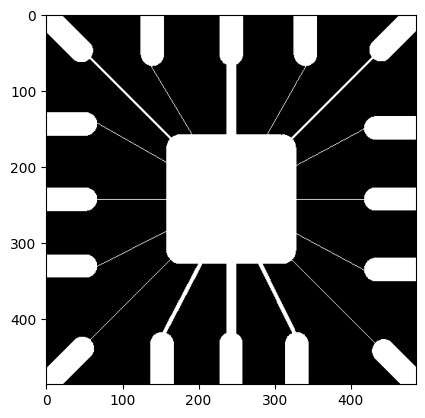

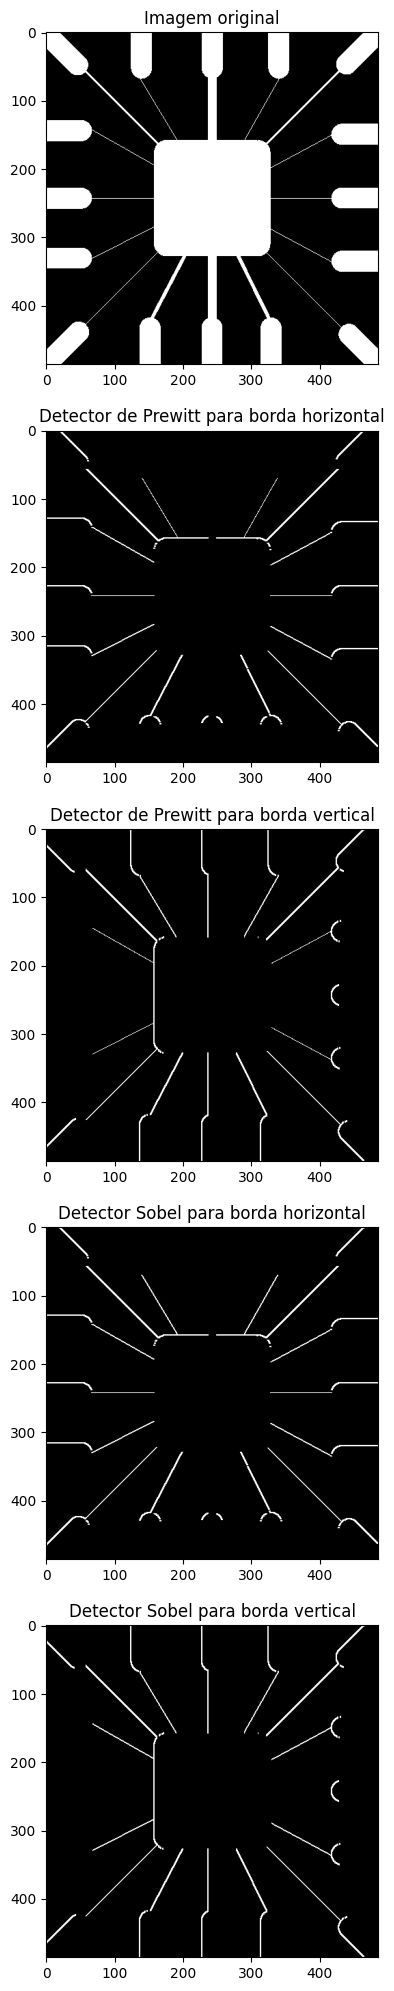

In [4]:
## -- Seu código termina AQUI -- ##

# Local da Imagem

# Leitura de imagem
img = plt.imread('wirebond_mask.tif')

# Plotando a Imagem
plt.imshow(img,cmap='gray')

#Aplicação dos detectores de borda de Prewitt

img_prewitt_p1 = cv.filter2D(img, -1, p1)  #Detecção de bordas na horizontal
img_prewitt_p2 = cv.filter2D(img, -1, p2)  #Detecção de bordas na vertical

#Aplicação dos detectores de borda sobel
img_sobel_s1 = cv.filter2D(img, -1, s1)   #Detecção de bordas na horizontal
img_sobel_s2 = cv.filter2D(img, -1, s2)  #Detecção de bordas na vertical

#Plots (resultados)

plt.figure(figsize = (25,25))
plt.subplot(5,1,1)
plt.imshow(img, cmap = "gray")
plt.title("Imagem original")

plt.subplot(5,1,2)
plt.imshow(img_prewitt_p1, cmap = "gray")
plt.title("Detector de Prewitt - Borda horizontal")

plt.subplot(5,1,3)
plt.imshow(img_prewitt_p2, cmap = "gray")
plt.title("Detector de Prewitt - borda vertical")

plt.subplot(5,1,4)
plt.imshow(img_sobel_s1, cmap = "gray")
plt.title("Detector Sobel - Borda horizontal")

plt.subplot(5,1,5)
plt.imshow(img_sobel_s2, cmap = "gray")
plt.title("Detector Sobel - Borda vertical")

plt.show()
## -- Seu código termina AQUI -- ##

### Comentário:

Pelos resultados obtidos é possivel observar que em relação à detecção de bordas verticais, os kernels utilizados para o operador sobel e de prewitt foram implementados para detectar bordas cujo gradiente tivesse sentido da esquerda para a direita, de forma a encontrar somente bordas que estivessem entre uma transição de uma região com pixels pretos e pixels brancos, o que é mostrados nos plots relativos à detecção de bordas verticais gerados. Em relação à detecção de bordas horizontais, os kernel dos detectores utilizados foram implementados para encontrar bordas cujo gradiente tivesse sentido de cima para baixo, ou seja, entre uma transição de uma região de pixels pretos seguida de uma região de pixels brancos. Comparando-se os detectores de prewitt e sobel é possível verificar pelas imagens processadas que o sobel consegue ressaltar melhor as bordas detectadas, uma vez que seu kernel característico é formado por uma matriz 3 x 3 que possui pesos maiores, influenciando diretamente no melhor realce de algumas bordas que antes, na detecção de prewitt, ficaram mais suaves. Entretano, mesmo com estas diferenças comentadas, os algoritmos de segmentação de bordas conseguiram apresentar resultados quase semelhantes, a partir dos kernels utilizados para a filtragem.

#### 1.2) Sobel e Laplaciano (Nota 1.5/10)

1. Leia a imagem ```house.tif```. Mostre a imagem na tela.
2. Aplique todos os detectores de bordas de Sobel na imagem lida no item 1. Mostre as imagens resultantes em um subplot.
2. Para cada *kernel*, aplique um *threshold* no resultado do filtro a fim de tentar manter somente as bordas que aquele filtro foi desenvolvido para detectar. Nas dicas deixamos um valor sugerido.
3. Some o resultado obtido por cada *kernel* em uma variável chamada  ```sobel_sum ```.
3. Aplique o detector de bordas Laplaciano na imagem ```house.tif```. Mostre em um subplot a imagem original, a soma de todos os resultados de Sobel (```sobel_sum```) e o resultado do Laplaciano. Coloque título nas imagens. O que se pode concluir?

**Dicas:**

* O valor de *threshold* sugerido é 220. Observe que para cada kernel, deve-se encontrar um valor mais adequado.

*  Faça um ```for loop``` para aplicar os filtros de Sobel. Isso simplifica o código.

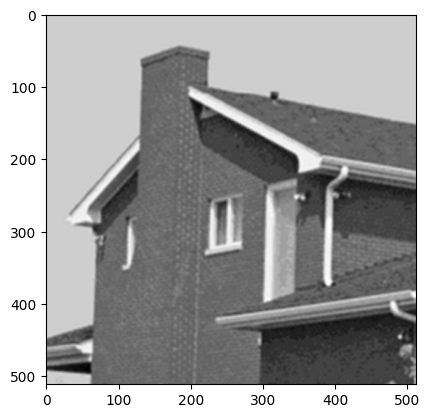

In [10]:
## -- Seu código começa AQUI -- ##

#Importar imagem original em grayscale
img = cv.imread("house.tif",0)

plt.imshow(img, cmap="gray")

## -- Seu código termina AQUI -- ##

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Soma dos sobels')

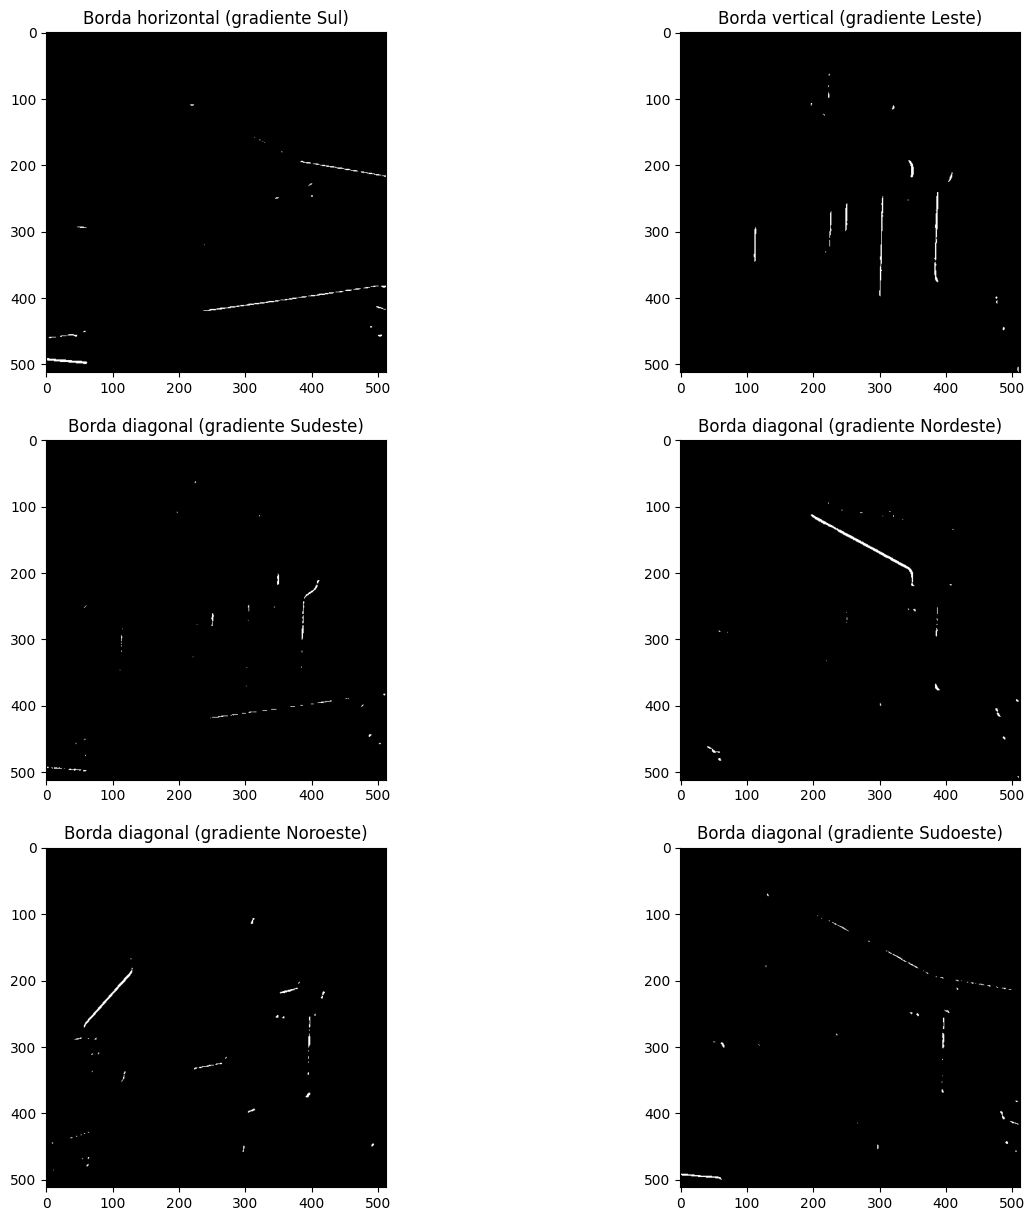

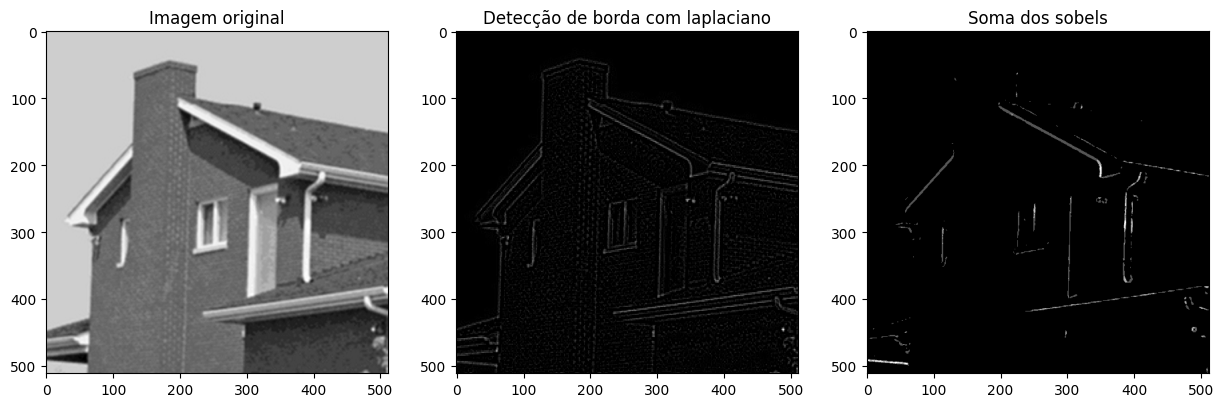

In [13]:
# DICA: você pode usar um espaço como este para simular os melhores thresholds para cada kernel.

#@title Teste Threshold{ run: "auto" }

Threshold = 197 #@param {type:"slider", min:0, max:255, step:1}

## -- Seu código começa AQUI -- ##

#sobel_sum irá armazenar a soma dos resultados das aplicações dos kernels dos detectores de sobel
sobel_sum = np.zeros(img.shape)

print(sobel_sum)


i = 1 #Variavel pra incrementar os subplot no loop

#Vetor para as legendas para os plots dos detectores de sobel
legenda = ['Borda horizontal (gradiente Sul)'   ,
           'Borda vertical (gradiente Leste)'   ,
           'Borda diagonal (gradiente Sudeste)' ,
           'Borda diagonal (gradiente Nordeste)',
           'Borda diagonal (gradiente Noroeste)',
           'Borda diagonal (gradiente Sudoeste)']


#Aplicação do detector de bordas laplaciano
l = cv.filter2D(img, -1, laplaciano)

#Resultados

plt.figure(figsize = (15,15))
for kernel in sobel:
  s = cv.filter2D(img, -1, kernel)
  ret, thr = cv.threshold(s,220,255,cv.THRESH_BINARY) #Aplicação do threshold na imagem original, com um valor médio de 220 para filtrar as bordas
  sobel_sum = sobel_sum + thr                         #Soma dos resultados dos filtros sobel aplicados
  plt.subplot(3,2,i)
  plt.imshow(thr, cmap = 'gray')
  plt.title(legenda[i-1])
  i += 1

plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title("Imagem original")

plt.subplot(1,3,2)
plt.imshow(l, cmap = 'gray')
plt.title("Detecção de borda com laplaciano")

plt.subplot(1,3,3)
plt.imshow(sobel_sum, cmap = 'gray')
plt.title("Soma dos sobels")


## -- Seu código termina AQUI -- ##

### Comentário:

Pela composição dos kernels do detector de sobel, foi possível verificar através de suas aplicações na imagem original que os kernels s1, s2, s3 ,s4, s5 e s6 conseguiram encontrar as seguintes bordas:

s1: Detecta bordas horizontais, já que seu gradiente é no sentido sul. s2: Detecta bordas verticais já que seu gradiente é no sentido leste. s3: Detecta bordas diagonais, de acordo com um gradiente no sentido Sudeste. s4: Detecta bordas diagonais, de acordo com um gradiente no sentido nordeste. s5: Detecta bordas diagonais, de acordo com um gradiente no sentido noroeste s6: Detecta bordas diagonais, de acordo com um gradiente no sentido sudoeste.

Com a aplicação do threshold nas imagens resultantes a partir de um limiar médio de 220, foi possível verificar através dos plots as direções de bordas detectadas por cada um dos tipos de kernels, apesar de que algumas bordas não ficaram muito bem ressaltadas nas imagens resultantes devido à referência de limiar utilizada. Somando-se todos as detecções realizadas individualmente com o detector de bordas de sobel, foi possível gerar uma imagem resultante que mostrasse todas as bordas, ou seja, em todas as direções, detectadas. Aplicando-se o detector de borda laplaciano, foi possível encontrar na imagem da casa as bordas em todas as direções, porém este detector produziu bordas duplas e se apresentou mais sensível à alguns ruídos e detalhes da parede da casa que não se enquandram em uma borda muito bem definida.

## 2) Influência da iluminação na segmentação (Nota 2.0/10)

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora_.png" width="256" height="256"></center>

<center><caption><b> Figura 1:</b> Imagem abobora.tif.</b></caption></center>

1. Utilize o método de Otsu para binarizar a imagem `abobora.tif`.
2. Divida a imagem em 8, 32 e 256 sub-imagens, aplique o método de Otsu em cada uma delas e remonte a imagem final (Tenha em mente que a divisão deve ser feita de forma a segmentar em sub-regiões com o máximo de características semelhantes, de forma a se aproveitar da melhor forma o método utilizado).
3. Apresente a imagem original , e dos resultados dos itens 1 e 2 em um subplot. Coloque título em cada plot.
4. Comente os resultados obtidos.

(512, 512)


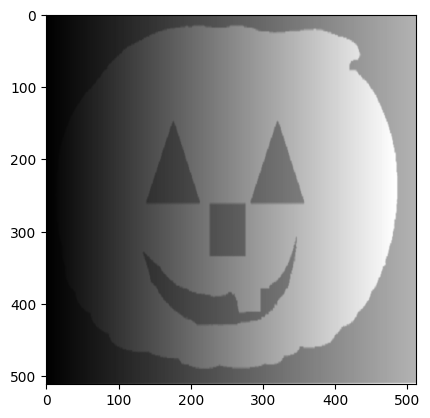

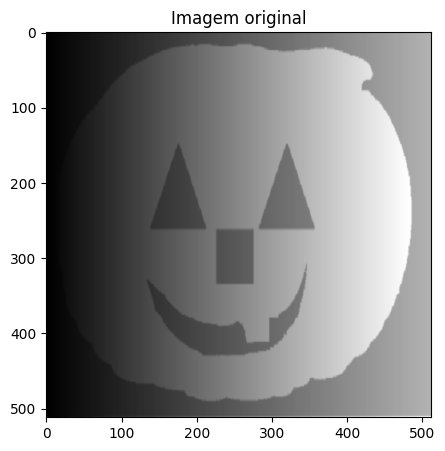

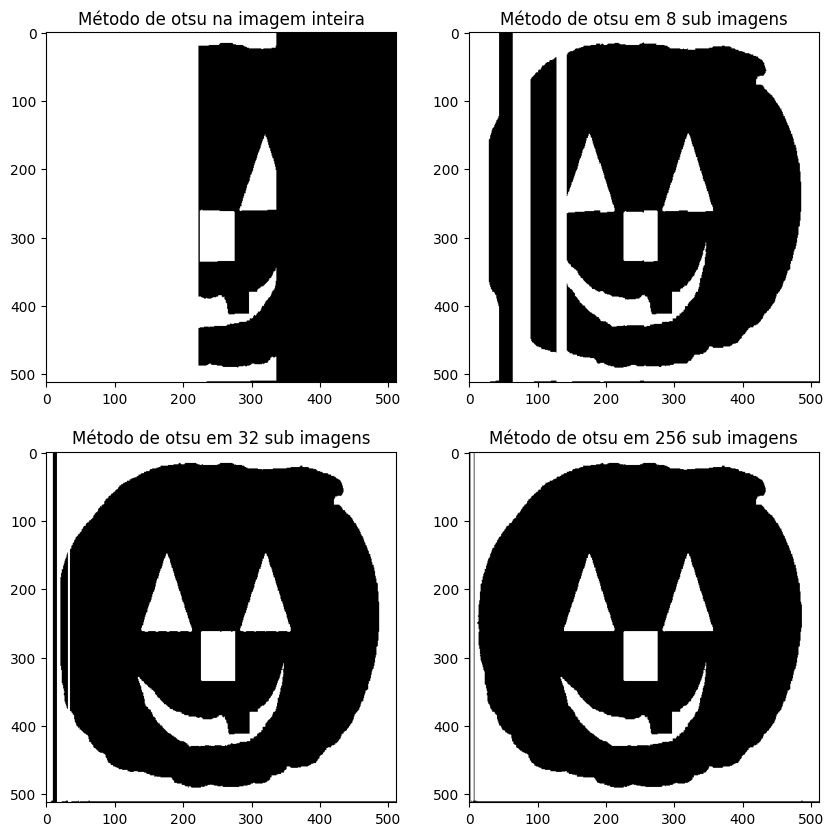

In [22]:
## -- Seu código começa AQUI -- ##

#Função para realizar a subdivisão das imagens de forma geral
def subdivideImg(img,sub):
  imgRecovered = np.zeros(img.shape, np.uint8)
  xmin = 0
  xmax = int(img.shape[1]/sub)
  for i in range (sub):
    SubImage = img[:,xmin:xmax]
    #Aplicação do metodo de otsu
    ret, th = cv.threshold(SubImage, 0,255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    imgRecovered[:,xmin:xmax] = th
    xmin = xmax
    xmax = xmax + int(img.shape[1]/sub)
  
  return imgRecovered

# Lendo a Imagem

img = cv.imread('abobora.tif',0)

plt.imshow(img, cmap='gray')

#Pegar tamanho da imagem
(m,n) = img.shape
print(img.shape)

#Aplicação do método de otsu
ret, th = cv.threshold(img, 0,255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


#Aplicação do método de otsu nas sub divisões da imagem
otsu1 = subdivideImg(img,8)
otsu2 = subdivideImg(img,32)
otsu3 = subdivideImg(img,256)

#Resultados
plt.figure(figsize = (5,5))
plt.imshow(img, cmap = "gray")
plt.title("Imagem original")

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(th, cmap = "gray")
plt.title("Método de otsu na imagem inteira")

plt.subplot(2,2,2)
plt.imshow(otsu1, cmap = "gray")
plt.title("Método de otsu em 8 sub imagens")

plt.subplot(2,2,3)
plt.imshow(otsu2, cmap = "gray")
plt.title("Método de otsu em 32 sub imagens")

plt.subplot(2,2,4)
plt.imshow(otsu3, cmap = "gray")
plt.title("Método de otsu em 256 sub imagens")

plt.show()
## -- Seu código termina AQUI -- ##

### Comentário: 

A image original da abóbora não possui intensidades de pixels constantes, ou seja, a iluminação da imagem muda em cada região da figura. Este fator prejudica a realização de uma limiarização global da imagem para a identificação de uma única classe, o que refeletiu diretamenta na aplicação do método de otsu globalmente na imagem original, de forma a não ser possível segmentar a imagem e identificar a abóbora por completo. Desta forma, dividindo-se a imagem em sub imagens para a aplicação do método de otsu localmente, foi possível identificar a figura da abóbora à medida com que se aumentava o número de subdivisões. Em relação a isso, observa-se que quando divide-se a imagem em 8 sub regiões, a figura completa da abóbora é identificada porém há a presença de algumas faixas que não compreendem a figura alvo, porém conforme se aumentava o número de sub regiões essas faixas começavam a desaparecer, até que com 256 divisões foi possível recuperar a imagem da abóbora por completo e segmentá-la. Conforme há o aumento de divisões da imagem a largura de cada uma das faixas vai se tornando menor, de forma a fazer com que as regiões recortadas apresentem uma maior homogeneidade da intensidade de pixels, possibilidade com que a técnica de limiarização seja realizada de forma eficiente.

## 3) Limiarização local (Nota 1.5/10)

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/sudoku_.png" width="256" height="156"></center>

<center><caption><b> Figura 2:</b> Imagem sudoku.tif.</b></caption></center>

1. A imagem `sudoku.tif` possui uma iluminação não uniforme. Aplique a binarização pelo método de limiarização local nessa imagem variando os parâmetros `blockSize` (tamanho da janela) e `C` (constante a ser diminuída da média) de forma a se obter um resultado satisfatório.

2. Aplique a binarização pelo método de Otsu e compare com o resultado obtido no item 1.

**Dicas:**

* A limiarização local pode ser feita pela função [cv.adaptiveThreshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3). Utilize o método adaptativo `cv.ADAPTIVE_THRESH_MEAN_C` que calcula o limiar como sendo a média de uma vizinhança `blockSize x blockSize` subtraída de uma constante `C`.

``` python
# Limiarização local pela média
th3 = cv.adaptiveThreshold(img,maxVal,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize,C)
```

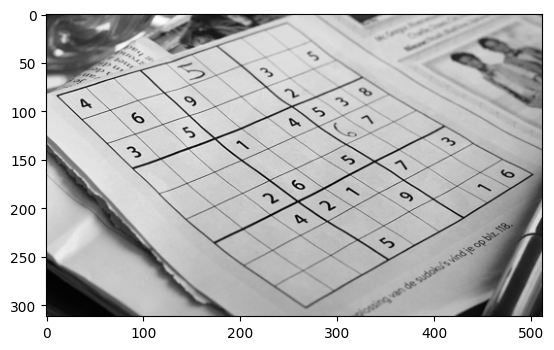

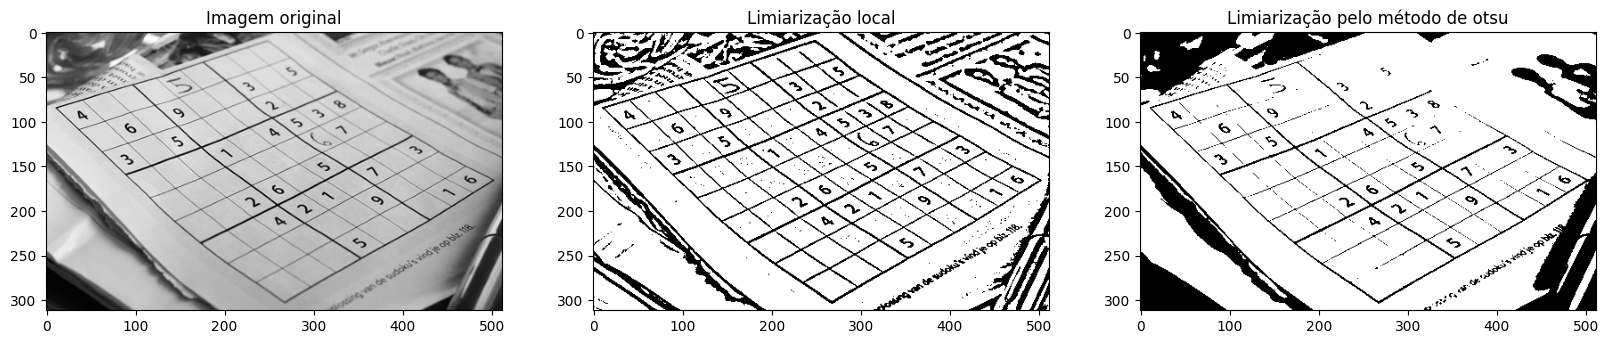

In [18]:
## -- Seu código começa AQUI -- ##

# Lendo a Imagem

img = cv.imread('sudoku.tif',0)
plt.imshow(img, cmap='gray')

#Limiarização local pela média
blockSize = 11
C = 5
th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize,C)

#Limiarização pelo método de otsu
ret, thOtsu = cv.threshold(img, 0,255, cv.THRESH_BINARY + cv.THRESH_OTSU)

#Resultados
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(img,cmap = "gray")
plt.title("Imagem original")

plt.subplot(1,3,2)
plt.imshow(th,cmap = "gray")
plt.title("Limiarização local")

plt.subplot(1,3,3)
plt.imshow(thOtsu,cmap = "gray")
plt.title("Limiarização pelo método de otsu")
plt.show()

## -- Seu código termina AQUI -- ##

### Comentários:

Aplicando-se a limiarização local ajustando os parâmetros blockSize e C, foi possível perceber que a partir de um valor de blockSize igual a 11, quando C é igual a 5, no mínimo, o processo de limiarização para a identificação das linhas e dos números foi realizado de forma a garantir uma boa identificação do sudoku, de forma nítida e bem ressaltada. Apesar disso, outras características que apresentavam intensidades de pixels próximas à intensidade dos números e das linhas do jogo foram identificadas. Como o processo de limiarização local realiza a limiarização variando o valor do threshold de acordo com as coordenadas da região da imagem inserida dentro de uma janela, então todos os pixels mais escuros passaram a ser identificados na imagem final. Em relação à limiarização pelo método de otsu, foi possível obvservar que o resultado não se apresentou tão eficiente quanto a limiarização local, uma vez que o otsu é um método de limiarização global que busca um valor de threshold ótimo em toda a imagem, considerando a variância entre a distribuição de intensidades de pixels. Apesar do método de otsu conseguir segmentar a imagem, já que havia uma grande probabilidade de ocorrência de pixels mais escuros, algumas linhas e números não foram identificados de forma contínua, diferentemente do que ocorrreu na limiarização local, havendo algumas falhas e descontinuidades. Além disso, no método de otsu, alguns detalhes ao fundo do jornal que contém o sudoku não foram identificados de forma suave, havendo uma perda de informação após a limiarização



## 4) K-means (Nota 3.5/10)

Neste exercício, queremos isolar os cartões coloridos da imagem `cores.jpeg`.

1. Leia e plote a imagem `cores.jpeg`.
2. Converta a imagem lida no item 1 para o espaço de cores para HSV.
3. Aplique o algoritmo de K-means no canal MATIZ. Escolha o valor k mais adequado. Repare que não será possível isolar todos os cartões neste passo. Mostre os valores máximo e mínimo da imagem resultante. Comente sobre o agrupamento resultante.
4. Aplique o algoritmo de K-means no canal SATURAÇÃO. Escolha o valor k mais adequado. Repare que não será possível isolar todos os cartões neste passo. Mostre os valores máximo e mínimo da imagem resultante. Comente sobre o agrupamento resultante.
5. Transforme as imagens resultantes dos itens 3 e 4 em máscaras para isolar os cartões destacados. Ou seja, analise um valor de threshold que transforma as imagens em imagens binárias. Mostre as máscaras obtidas.
6. Faça uma operação de OR entre as duas máscaras obtidas para obter uma máscara final. Mostre esta máscara.
7. Transforme a imagem `cores.jpeg`. para o espaço de cores RGB. Aplique a máscara obtida em 6 nesta imagem. Queremos que o fundo fique preto e apenas os cartões coloridos sejam mostrados na imagem.

**Dicas:**

* Você pode utilizar a função [cv.kmeans](https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88) para a segmentação. Você pode utilizar 20 iterações e epsilon = 0.01 para o K-means.

* Para utilizar o K-means você deve passar a imagem como um vetor (1D). O método `.ravel()` e `.flatten()` fazem isso. Além disso, a imagem deve estar em `float32`.

* Para retornar a imagem resultante do k-means para o shape original, você pode utilizar a função `img_res.reshape(shape original)`.

``` python
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
ret,label,centers = cv.kmeans(myVector, nCluster(k), None, criterio, 5, cv.KMEANS_PP_CENTERS)

```

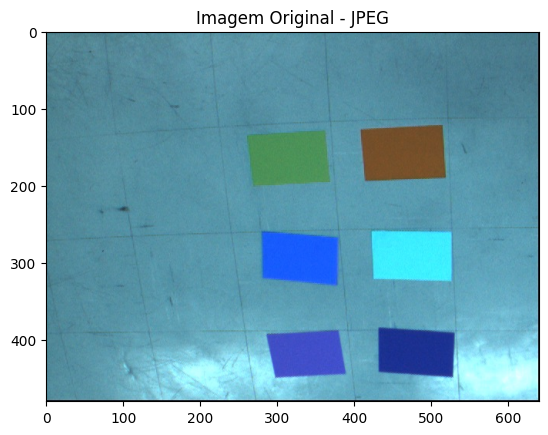

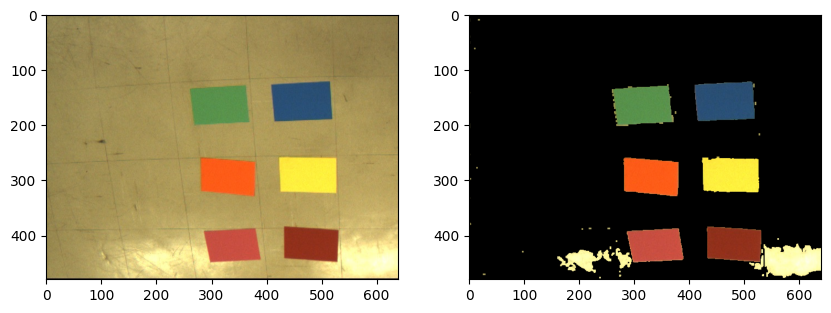

In [21]:
## -- Seu código começa AQUI -- ##

img_bgr = cv.imread("cores.jpeg")
plt.imshow(img_bgr)
plt.title("Imagem Original - JPEG")

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

#Capturar os canais H, S, V para aplicar posteriormente o K-means na matiz (H)
(H,S,V) = cv.split(img_hsv)

nCluster = 5   #K = 5 (número de classes para segmentar)
nIteracao = 20
epsilon = 0.01

# K-means aqui
convertedImg = H.astype(np.float32)   #Converter imagem para o tipo float32
imgVector = np.ravel(convertedImg)
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
ret,label,centers = cv.kmeans(imgVector, nCluster, None, criterio, 5, cv.KMEANS_PP_CENTERS)

## -- Seu código termina AQUI -- ##


# Cálcula a área de cada label
areas = np.empty_like(centers)
for i in range(centers.shape[0]):
  mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
  areas[i] = mask.sum()

# Ordem crescente
areas = np.sort(areas,axis=0)

# Cria uma mascara para cada label e aplica na imagem original
segment = np.zeros_like(img_bgr, np.uint8)

for i in range(centers.shape[0]):
  mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
  # Se for o fundo, atribua o valor 0
  if(mask.sum() == areas[-1]):
    mask[:] = 0
  mask = cv.morphologyEx(np.uint8(mask), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(3,3)))
  mask = np.tile(np.expand_dims(mask,axis=-1),(1,1,3))
  segment = segment + np.uint8(mask * img_bgr)

# Mostra o resultado
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB));
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(segment,cv.COLOR_BGR2RGB));
## -- Seu código termina AQUI -- ##

### Comentários: 

Aplicando-se o método de segmentação através do k-means, utilizando-se um número de clusters K = 5, 20 iterações e um epsilon = 0.01 foi possível identificar corretamente os 6 cartões coloridos. Cabe ressaltar que, aplicando-se o k-means no canal de matiz da imagem convertida para o espaço hsv, foi possível separar mais facilmente as cores a serem identificadas em grupos de classes já que cada cartão possui uma cor diferente. Para este problema, foi possível utilizar um cluster K = 5, ao invés de K=6 para a identificação dos 6 cartões, uma vez que há alguns cartões que apresentam intensidade de pixels próximos entre si, devido ao fato de serem cores próximas uma das outras no canal da matiz (canal H). Como os dois cartões da última linha possuem cores ligeiramente próximas entre si, então o método k-means atribuiu os pixels dessas cores à um mesmo agrupamento, pois eles estavam mais próximos ao valor médio de um mesmo grupo em específico